In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
neurons = pd.read_csv('/Users/SydneyWalker/Downloads/neurons.csv.gz')
connections = pd.read_csv('/Users/SydneyWalker/Downloads/connections.csv.gz')[['pre_root_id','post_root_id','neuropil','syn_count']]
lowsalt_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/lowsalt_neurons.csv').query("side == 'left'")[['root_id','label','output_synapses']]

In [4]:
lowsalt_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/lowsalt_downstream.csv')[['root_id','label','input_synapses']]

In [5]:
result = connections.groupby(['pre_root_id', 'post_root_id','neuropil'])['syn_count'].sum().reset_index()

lowsalt_merge = pd.merge(result, lowsalt_neurons['root_id'], left_on = 'pre_root_id', right_on = 'root_id', how = 'inner')
lowsalt_merge = lowsalt_merge.drop(columns='root_id')

lowsalt_merge2 = pd.merge(lowsalt_merge, lowsalt_downstream, left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
lowsalt_connections = lowsalt_merge2.groupby(['post_root_id'])['syn_count'].sum().reset_index()

lowsalt_labels = pd.merge(lowsalt_connections, lowsalt_downstream,left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
lowsalt_labels = lowsalt_labels.drop(columns = 'root_id')

lowsalt_labels.rename(columns={'input_synapses': 'total_num_input_synapses','syn_count':'num_input_lowsalt_synapses','post_root_id':'second_order_cell_ID'}, inplace=True)
lowsalt_labels['percent_input_from_lowsalt_GRNs'] = lowsalt_labels['num_input_lowsalt_synapses'] / lowsalt_labels['total_num_input_synapses'] * 100
lowsalt_labels = lowsalt_labels.sort_values(by = 'percent_input_from_lowsalt_GRNs', ascending = False)

In [6]:
lowsalt_upstream = lowsalt_merge2.groupby('post_root_id')['pre_root_id'].nunique().reset_index()
lowsalt_upstream.columns = ['second_order_cell_ID', 'num_upstream_lowsalt_cells']

In [7]:
cells_upstream = connections.groupby('post_root_id')['pre_root_id'].nunique().reset_index()
cells_upstream.columns = ['second_order_cell_ID', 'num_upstream_cells']

In [8]:
lowsalt_labels2 = pd.merge(lowsalt_labels, lowsalt_upstream, on = 'second_order_cell_ID')
lowsalt_labels2 = pd.merge(lowsalt_labels2, cells_upstream, on = 'second_order_cell_ID', how = 'inner')
lowsalt_labels2[0:3]

,second_order_cell_ID,num_input_lowsalt_synapses,label,total_num_input_synapses,percent_input_from_lowsalt_GRNs,num_upstream_lowsalt_cells,num_upstream_cells
0,720575940624234254,233,[],591,39.424704,11,28
1,720575940631082124,54,['lGRN'; 'Gustatory Receptor Neuron (GRN); Put...,142,38.028169,4,9
2,720575940621953285,228,['WEDa1_ventral'],673,33.878158,9,28


In [9]:
third_order_connections = (pd.merge(lowsalt_labels2[['second_order_cell_ID','label']], connections, left_on='second_order_cell_ID', right_on='pre_root_id', how = 'inner').query("syn_count >=5"))

In [11]:
third_order_connections

,second_order_cell_ID,label,pre_root_id,post_root_id,neuropil,syn_count
0,720575940624234254,[],720575940624234254,720575940604395436,SLP_L,5
2,720575940624234254,[],720575940624234254,720575940604516524,LH_L,6
3,720575940624234254,[],720575940624234254,720575940604516524,SLP_L,44
5,720575940624234254,[],720575940624234254,720575940604921446,LH_R,13
9,720575940624234254,[],720575940624234254,720575940607731292,SLP_L,10
...,...,...,...,...,...,...
4158,720575940624600840,['Second-order bitter neuron Scapula (Shiu; St...,720575940624600840,720575940647003188,FLA_L,5
4159,720575940624600840,['Second-order bitter neuron Scapula (Shiu; St...,720575940624600840,720575940652580086,GNG,9
4160,720575940624600840,['Second-order bitter neuron Scapula (Shiu; St...,720575940624600840,720575940660223873,PRW,6
4161,720575940624600840,['Second-order bitter neuron Scapula (Shiu; St...,720575940624600840,720575940660223873,GNG,11


In [10]:
stop

NameError: name 'stop' is not defined

In [ ]:
def projection(neuropil):
    if neuropil == 'GNG':
        return 'local'
    else:
        return 'outside SEZ'

In [ ]:
lowsalt_labels2.sort_values(by= 'num_input_lowsalt_synapses', ascending = False)

#exclude GRNs when tracing third orders

,second_order_cell_ID,num_input_lowsalt_synapses,label,total_num_input_synapses,percent_input_from_lowsalt_GRNs,num_upstream_lowsalt_cells,num_upstream_cells
11,720575940631092943,590,['DNg'],3020,19.536424,11,117
15,720575940620553094,442,['SEZ interneuron closely matching GRN arbors'],4534,9.748566,11,200
18,720575940614635175,378,[],4972,7.602574,11,212
0,720575940624234254,233,[],591,39.424704,11,28
2,720575940621953285,228,['WEDa1_ventral'],673,33.878158,9,28
10,720575940621218694,192,['Pringle; See Sterne et al.; 2021; https://do...,945,20.317460,11,86
19,720575940637956698,68,[],981,6.931702,4,43
4,720575940628198503,54,['lGRN'; 'Gustatory Receptor Neuron (GRN); Put...,178,30.337079,6,10
1,720575940631082124,54,['lGRN'; 'Gustatory Receptor Neuron (GRN); Put...,142,38.028169,4,9
3,720575940610683315,44,['Gustatory Receptor Neuron (GRN); Putative Ir...,130,33.846154,5,10


In [ ]:
third_order_connections['projection'] = third_order_connections['neuropil'].apply(projection)
third_order_connections = third_order_connections.drop(columns=['pre_root_id'])
third_order_connections = third_order_connections.rename(columns={'post_root_id':'third_order_cell_ID','label':'second_order_cell_label'})


In [ ]:
third_order_connections[0:3]
#if projects outside the sez, do not classify as local
#second order vs # synapses 

,second_order_cell_ID,second_order_cell_label,third_order_cell_ID,neuropil,syn_count,projection
0,720575940624234254,[],720575940604395436,SLP_L,5,outside SEZ
2,720575940624234254,[],720575940604516524,LH_L,6,outside SEZ
3,720575940624234254,[],720575940604516524,SLP_L,44,outside SEZ


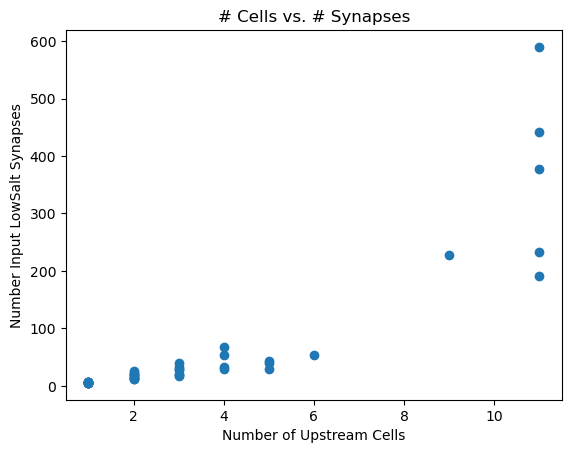

In [ ]:
x = lowsalt_labels2['num_upstream_lowsalt_cells']
y = lowsalt_labels2['num_input_lowsalt_synapses']

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('Number of Upstream Cells')
plt.ylabel('Number Input LowSalt Synapses')
plt.title('# Cells vs. # Synapses')

# Show the plot
plt.show()

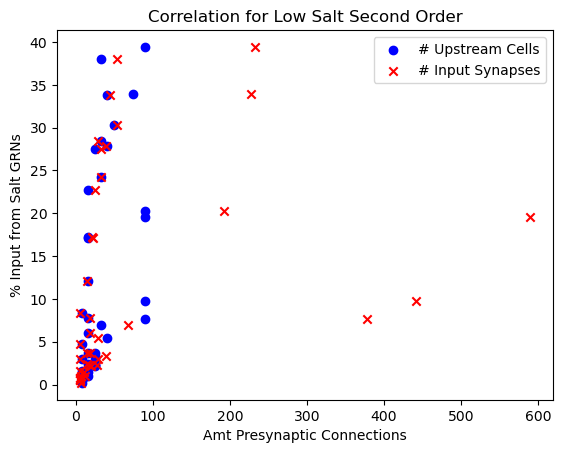

In [ ]:
x1 = lowsalt_labels2['num_upstream_lowsalt_cells']*8.2
y1 = lowsalt_labels2['percent_input_from_lowsalt_GRNs']

x2 = lowsalt_labels2['num_input_lowsalt_synapses']
y2 = lowsalt_labels2['percent_input_from_lowsalt_GRNs']

fig, ax = plt.subplots()

ax.scatter(x1, y1, label='# Upstream Cells', color='blue', marker='o')
ax.scatter(x2, y2, label='# Input Synapses', color='red', marker='x')


ax.set_xlabel('Amt Presynaptic Connections')
ax.set_ylabel('% Input from Salt GRNs')
ax.set_title('Correlation for Low Salt Second Order')

ax.legend()
plt.show()

In [ ]:
import navis

In [ ]:
navis.example_neurons(n=2, kind='mesh')

,type,name,id,units,n_vertices,n_faces
0,navis.MeshNeuron,DA1_lPN_R,1734350788,8 nanometer,6309,13054
1,navis.MeshNeuron,DA1_lPN_R,1734350908,8 nanometer,7098,14620


In [ ]:
navis.plot3d(720575940624234254)